#**Social Media and Web Analytics**

###**Submitted By: Group 8**
###**Term V**


------
- Fetching the data from airlinequality(Preparing the dataset) - **Data Scraping**

In [ ]:
# STEP 1: Install and import required libraries
!pip install requests pandas beautifulsoup4 tqdm -q

import requests
import pandas as pd
from bs4 import BeautifulSoup
from tqdm.notebook import tqdm
import time

# STEP 2: Set up the scraping parameters
# We now use a list of dictionaries. You can add more airlines here.
# Just find the correct URL slug from airlinequality.com ('air-asia' for Air Asia)
airlines_to_scrape = [
    {'name': 'Air India', 'slug': 'air-india'},
    {'name': 'Air Asia', 'slug': 'airasia'}
]

pages_per_airline = 50  # It will scrape this many pages for EACH airline.
reviews_data = []       # This list will hold all reviews from ALL airlines.

print(f"Preparing to scrape {pages_per_airline} pages for {len(airlines_to_scrape)} airlines...")

# STEP 3: Loop through each airline in our list
for airline in tqdm(airlines_to_scrape, desc="Scraping Airlines"):

    airline_name = airline['name']
    airline_slug = airline['slug']

    print(f"\n--- Now scraping: {airline_name} ---")

    # Loop through each page for the current airline
    for page_num in tqdm(range(1, pages_per_airline + 1), desc=f"Pages for {airline_name}", leave=False):

        # Construct the URL for the current page
        url = f"https://www.airlinequality.com/airline-reviews/{airline_slug}/page/{page_num}/?sortby=post_date%3ADesc&pagesize=100"

        # Make a request to the website
        response = requests.get(url)

        if response.status_code != 200:
            print(f"Failed to load page {page_num} for {airline_name}. Status: {response.status_code}")
            continue

        soup = BeautifulSoup(response.content, 'html.parser')
        all_reviews_on_page = soup.find_all('article', {'itemprop': 'review'})

        # STEP 4: Loop through each review on the page and extract its data
        for review in all_reviews_on_page:

            review_title = review.find('h2', class_='text_header').get_text(strip=True).replace('"', '')
            author_name = review.find('span', itemprop='name').get_text(strip=True)
            review_date = review.find('time', itemprop='datePublished')['datetime']

            rating_element = review.find('div', itemprop='reviewRating')
            overall_rating = rating_element.find('span', itemprop='ratingValue').get_text(strip=True) if rating_element and rating_element.find('span', itemprop='ratingValue') else None

            review_text_element = review.find('div', class_='text_content')
            full_review_text = review_text_element.get_text(strip=True) if review_text_element else ""

            if "Trip Verified" in full_review_text:
                verified = True
                review_text = full_review_text.replace("Trip Verified |", "").strip()
            elif "Not Verified" in full_review_text:
                verified = False
                review_text = full_review_text.replace("Not Verified |", "").strip()
            else:
                verified = None
                review_text = full_review_text

            review_details = {
                'Type Of Traveller': None, 'Seat Type': None, 'Route': None,
                'Date Flown': None, 'Seat Comfort': None, 'Cabin Staff Service': None,
                'Food & Beverages': None, 'Inflight Entertainment': None,
                'Value For Money': None, 'Recommended': None
            }

            table_rows = review.find_all('tr')
            for row in table_rows:
                header = row.find('td', class_='review-rating-header')
                value_cell = row.find('td', class_='review-value')

                if header:
                    header_text = header.get_text(strip=True)
                    if header_text in review_details:
                        stars = row.find_all('span', class_='star fill')
                        if stars:
                            review_details[header_text] = len(stars)
                        elif value_cell:
                            review_details[header_text] = value_cell.get_text(strip=True)

            # STEP 5: Store all collected data for this single review in a dictionary
            review_dict = {
                'Airline': airline_name, # Use the dynamic airline name
                'Review Title': review_title,
                'Author': author_name,
                'Review Date': review_date,
                'Review Text': review_text,
                'Verified Trip': verified,
                'Overall Rating': overall_rating,
                'Type Of Traveller': review_details['Type Of Traveller'],
                'Seat Type': review_details['Seat Type'],
                'Route': review_details['Route'],
                'Date Flown': review_details['Date Flown'],
                'Seat Comfort': review_details['Seat Comfort'],
                'Cabin Staff Service': review_details['Cabin Staff Service'],
                'Food & Beverages': review_details['Food & Beverages'],
                'Inflight Entertainment': review_details['Inflight Entertainment'],
                'Value For Money': review_details['Value For Money'],
                'Recommended': review_details['Recommended']
            }

            reviews_data.append(review_dict)

        time.sleep(1)

print(f"\nScraping complete. Total reviews collected: {len(reviews_data)}")

# STEP 6: Create a Pandas DataFrame from the collected data
df = pd.DataFrame(reviews_data)

# STEP 7: Final Data Cleaning and Formatting
df['Review Date'] = pd.to_datetime(df['Review Date'])
df['Overall Rating'] = pd.to_numeric(df['Overall Rating'], errors='coerce')

print("\n--- Combined Data Preview ---")
display(df.head())
print("\n--- Data distribution by Airline ---")
print(df['Airline'].value_counts())
print("\n--- Data Info ---")
df.info()

# STEP 8: Save the final combined DataFrame to a CSV file
output_filename = 'airline_reviews_combined.csv'
df.to_csv(output_filename, index=False)

# This will trigger a download of the file in your browser
from google.colab import files
files.download(output_filename)

print(f"\ncombined Data saved and download initiated for '{output_filename}'")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 110.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



Missing Values Before Cleaning:

<bound method DataFrame.info of         Airline                             Review Title              Author  \
0     Air India           earn an additional 1000 points            R Vanush   
1     Air India                     The plane was so old  Jan-Marie Crenshaw   
2     Air India  advise against flying with this airline           R Hamalan   
3     Air India                   needs to work on seats      Gurpartap Brar   
4     Air India                 Super unreliable airline        Badri Paudel   
...         ...                                      ...                 ...   
1464  Air India                Air India customer review           J Russell   
1465  Air India                Air India customer review          A Johnston   
1466  Air India                Air India customer review            J Samson   
1467  Air India                Air India customer review           G Narayan   
1468  Air India                Air India customer revi

/tmp/ipython-input-1273012749.py:159: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Vader_Sentiment", data=df, palette="Pastel1")


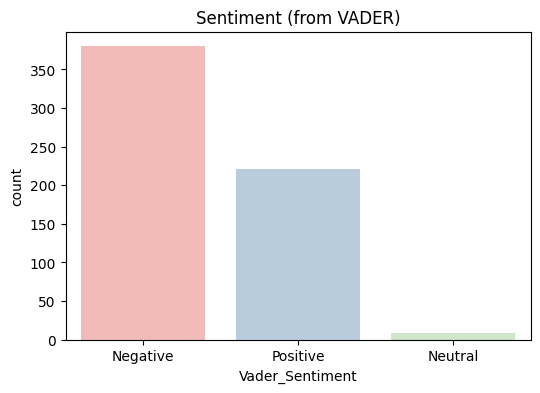

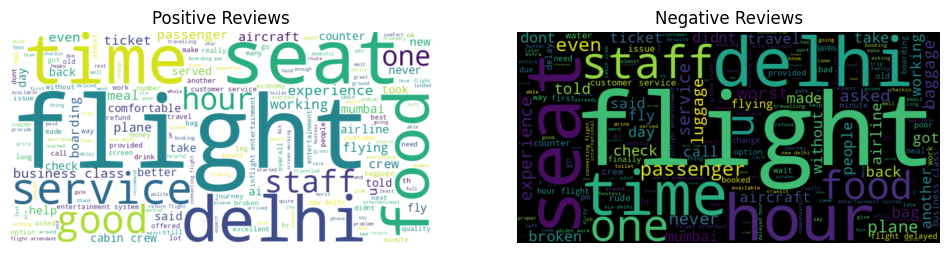

    Overall Rating TextBlob_Sentiment Vader_Sentiment
0              1.0           Negative        Negative
1              1.0            Neutral        Negative
2              8.0           Positive        Positive
3              4.0            Neutral        Negative
4             10.0           Positive        Positive
5              2.0           Negative        Negative
6              1.0            Neutral        Positive
7              2.0            Neutral        Negative
8              7.0           Positive        Positive
9              1.0            Neutral        Positive
10             2.0           Negative        Negative
11             1.0           Negative        Negative
12             1.0            Neutral        Positive
13             1.0            Neutral        Positive
14             2.0            Neutral        Positive
15             2.0            Neutral        Negative
16             1.0            Neutral        Negative
17             2.0          

In [ ]:
# =========================
# STEP 1: Install Libraries
# =========================
!pip install nltk spacy vaderSentiment textblob wordcloud --quiet
!python -m spacy download en_core_web_sm

# =========================
# STEP 2: Import Libraries
# =========================
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import spacy
import nltk
nltk.download('punkt_tab')
# Download resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Load SpaCy model
nlp = spacy.load("en_core_web_sm")

# =========================
# STEP 3: Load Dataset + Remove Missing Values
# =========================
df = pd.read_excel("dataset for airindia.xlsx")

# Check missing values before cleaning
print("\nMissing Values Before Cleaning:\n")
print(df.info)
print(df.isnull().sum())

# Drop all rows that contain at least one null value
df = df.dropna(how='any')

# Reset index after dropping rows
df = df.reset_index(drop=True)

# Check again to confirm
print("\nMissing Values After Cleaning:\n")
print(df.isnull().sum())

# =========================
# STEP 4: Custom Stopwords
# =========================
stop_words = set(stopwords.words('english'))

custom_stopwords = {"airindia", "air", "india", "airline", "airport"}

lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # 1. Lowercase
    text = text.lower()

    # 2. Remove special chars/numbers
    text = re.sub(r'[^a-z\s]', '', text)

    # 3. Tokenize
    tokens = nltk.word_tokenize(text)

    # 4. Remove default + custom stopwords
    tokens = [word for word in tokens
              if word not in stop_words
              and word not in custom_stopwords]

    # 5. Lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # 6. Join back
    return " ".join(tokens)

df['Clean_Review'] = df['Review Text'].astype(str).apply(preprocess_text)


# =========================
# STEP 5: TextBlob Sentiment
# =========================
def get_textblob_sentiment(text):
    analysis = TextBlob(str(text))
    if analysis.sentiment.polarity > 0.1:
        return "Positive"
    elif analysis.sentiment.polarity < -0.1:
        return "Negative"
    else:
        return "Neutral"

df['TextBlob_Sentiment'] = df['Clean_Review'].apply(get_textblob_sentiment)

# =========================
# STEP 6: VADER Sentiment
# =========================
analyzer = SentimentIntensityAnalyzer()

def get_vader_sentiment(text):
    scores = analyzer.polarity_scores(str(text))
    if scores['compound'] >= 0.05:
        return "Positive"
    elif scores['compound'] <= -0.05:
        return "Negative"
    else:
        return "Neutral"

df['Vader_Sentiment'] = df['Clean_Review'].apply(get_vader_sentiment)

# =========================
# STEP 7: Visualize Results - WORDCLOUD
# =========================
plt.figure(figsize=(6,4))
sns.countplot(x="Vader_Sentiment", data=df, palette="Pastel1")
plt.title("Sentiment (from VADER)")
plt.show()

# Wordclouds
positive_text = " ".join(df[df['Vader_Sentiment']=="Positive"]['Clean_Review'].astype(str))
negative_text = " ".join(df[df['Vader_Sentiment']=="Negative"]['Clean_Review'].astype(str))

wc_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
wc_neg = WordCloud(width=800, height=400, background_color='black').generate(negative_text)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(wc_pos, interpolation="bilinear")
plt.title("Positive Reviews")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(wc_neg, interpolation="bilinear")
plt.title("Negative Reviews")
plt.axis("off")
plt.show()

# =========================
# STEP 8: Compare Sentiment Methods
# =========================
print(df[['Overall Rating','TextBlob_Sentiment', 'Vader_Sentiment']].head(20))

- **TOPIC MODELING**

 <div style="text-align: center;">
  <img src="https://miro.medium.com/max/2796/1*cDwKSHmfp5awjqjobV707g.png" width="400">
   </div>



In [ ]:
# Vectorization
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range = (1,2), max_features=1000, max_df=0.5)
# see the above parameters and comment -- ?

X = vectorizer.fit_transform(df['Clean_Review'])

In [ ]:
# LDA Model - This is used for Topic Modeling popularly
# Specify beforehand the number of topics to be identified. This is given by number of components of LDA parameter
# set the 'K' - number of topics
from sklearn.decomposition import LatentDirichletAllocation
number_of_topics = 5
lda = LatentDirichletAllocation(n_components=number_of_topics, random_state=42)
lda.fit(X)

LatentDirichletAllocation(n_components=5, random_state=42)

In [ ]:
# Display topics and top words for each topic
feature_names = vectorizer.get_feature_names_out() # Get all the features/tokens names in vectorized data

num_words = 10            # Choose 'N' here the number of words to show for each LDA topic, to identify the topic

for idx, topic in enumerate(lda.components_):
    top_words_idx = topic.argsort()[-num_words:][::-1]
    top_words = [feature_names[i] for i in top_words_idx]
    print(f"Topic {idx+1}: {', '.join(top_words)}")

Topic 1: staff, boarding, seat, check, time, counter, ticket, delhi, even, said
Topic 2: delhi, hour, staff, new, one, time, experience, passenger, delay, delayed
Topic 3: hour, time, delhi, service, day, never, customer, worst, experience, luggage
Topic 4: customer, service, dont, time, call, please, customer service, baggage, bag, passenger
Topic 5: seat, food, entertainment, crew, working, service, good, time, delhi, experience


- **TOPIC MODELING: Wordcloud**

 <div style="text-align: center;">
  <img src="https://thumbs.dreamstime.com/b/air-travel-word-cloud-wordcloud-made-text-130384263.jpg" width="400">
   </div>

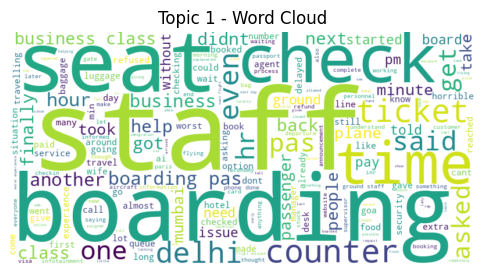

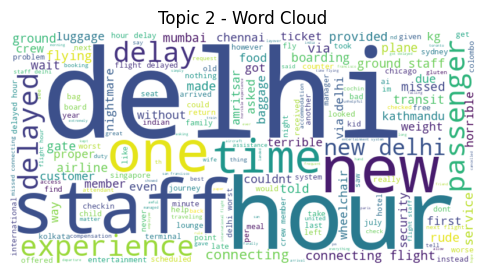

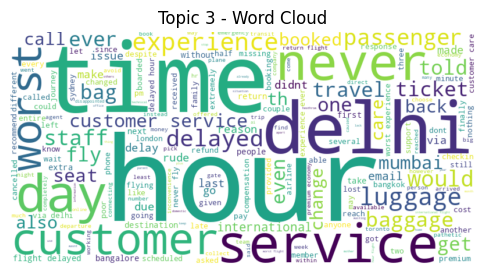

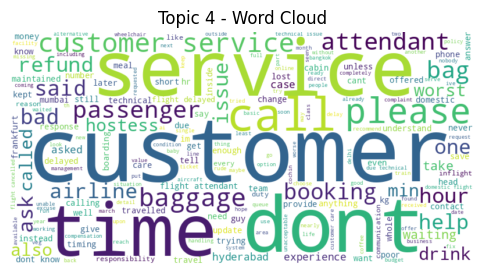

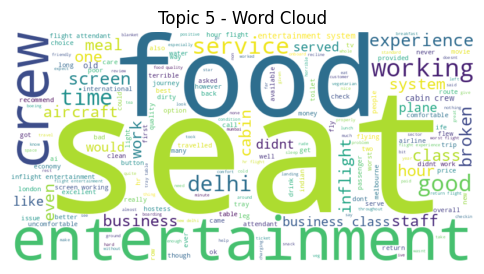

In [ ]:
# Word Clouds for Topics
for idx, topic in enumerate(lda.components_):
    plt.figure(figsize=(6, 4))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(zip(feature_names, topic)))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Topic {idx+1} - Word Cloud")
    plt.axis('off')
    plt.show()


- **SENTIMENT ANALYSIS USING BERT**

In [ ]:
#BERT

# =========================
# 1. Install BERTopic + dependencies
# =========================
!pip install bertopic umap-learn hdbscan sentence-transformers --quiet

# =========================
# 2. Imports
# =========================
import pandas as pd
from bertopic import BERTopic

# =========================
# 3. Load Reviews
# =========================
# Use cleaned column from preprocessing step ("Clean_Review")
texts = df['Clean_Review'].dropna().tolist()

# =========================
# 4. Fit BERTopic model
# =========================
topic_model = BERTopic(language="english", nr_topics="auto")
topics, probs = topic_model.fit_transform(texts)

# =========================
# 5. Explore topics
# =========================
print(topic_model.get_topic_info())   # Topic IDs, frequencies
print(topic_model.get_topic(0))       # Top words in Topic 0

# =========================
# 6. Visualize interactively
# =========================
topic_model.visualize_topics()
topic_model.visualize_barchart(top_n_topics=10)
topic_model.visualize_heatmap()
topic_model.visualize_hierarchy()

# =========================
# 7. Assign dominant topic back to dataframe
# =========================
df['BERT_Topic'] = topics
df[['Review Text','Clean_Review','BERT_Topic']].head()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.0/153.0 kB 4.9 MB/s eta 0:00:00


/usr/local/lib/python3.12/dist-packages/hdbscan/plots.py:448: SyntaxWarning: invalid escape sequence '\l'
  axis.set_ylabel('$\lambda$ value')
/usr/local/lib/python3.12/dist-packages/hdbscan/robust_single_linkage_.py:175: SyntaxWarning: invalid escape sequence '\{'
  $max \{ core_k(a), core_k(b), 1/\alpha d(a,b) \}$.


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

   Topic  Count                          Name  \
0     -1    243    -1_flight_delhi_seat_staff   
1      0    141  0_seat_flight_working_screen   
2      1     89      1_flight_hour_delhi_time   
3      2     63    2_good_flight_food_service   
4      3     31   3_baggage_bag_luggage_delhi   
5      4     15   4_flight_toronto_hour_delhi   
6      5     15  5_seat_flight_boarding_class   
7      6     12    6_food_vegetarian_veg_meal   

                                      Representation  \
0  [flight, delhi, seat, staff, hour, time, exper...   
1  [seat, flight, working, screen, entertainment,...   
2  [flight, hour, delhi, time, customer, delayed,...   
3  [good, flight, food, service, crew, time, exce...   
4  [baggage, bag, luggage, delhi, day, flight, ti...   
5  [flight, toronto, hour, delhi, delayed, wheel,...   
6  [seat, flight, boarding, class, time, pas, bus...   
7  [food, vegetarian, veg, meal, hindu, gluten, s...   

                                 Representative_Docs 

,Review Text,Clean_Review,BERT_Topic
0,This was the worst flight overseas we have had...,worst flight overseas plane old monitor ceilin...,0
1,Our recent Air India round-trip from Copenhage...,recent roundtrip copenhagen new delhi deeply f...,-1
2,I was very scared to book a AI flight after th...,scared book ai flight ahmedabad incident numer...,-1
3,Super unreliable airline. Biggest regret on ge...,super unreliable biggest regret getting ticket...,1
4,My first time travel to Delhi via Air India. I...,first time travel delhi via enjoyed two hour t...,2


- **Document Clustering**

 <div style="text-align: center;">
  <img src="https://machinelearninggeek.com/wp-content/uploads/2022/06/image-5.png" width="400">
   </div>


Cluster 0: seat, working, screen, tv, broken, food, crew, service, worst, experience

Cluster 1: hour, delhi, staff, time, customer, delayed, service, luggage, worst, baggage

Cluster 2: work, entertainment, seat, crew, hour, food, broken, dirty, worst, didnt

Cluster 3: good, food, time, service, delhi, seat, staff, entertainment, new, meal

Cluster 4: class, business, seat, economy, food, crew, delhi, experience, cabin, premium


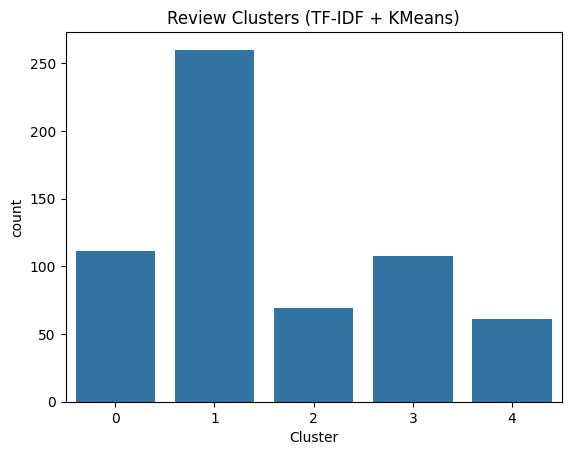

In [ ]:
#Document Clustering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Features: TF-IDF representation
vectorizer = TfidfVectorizer(max_df=0.8, min_df=2, stop_words='english')
X_tfidf = vectorizer.fit_transform(df['Clean_Review'])

# Choose number of clusters
k = 5
model = KMeans(n_clusters=k, random_state=42)
labels = model.fit_predict(X_tfidf)

# Save cluster labels
df['Cluster'] = labels

# Show top words per cluster
terms = vectorizer.get_feature_names_out()
order_centroids = model.cluster_centers_.argsort()[:, ::-1]

for i in range(k):
    top_terms = [terms[ind] for ind in order_centroids[i, :10]]
    print(f"\nCluster {i}: {', '.join(top_terms)}")

# Visualize sizes of clusters
sns.countplot(x=df['Cluster'])
plt.title("Review Clusters (TF-IDF + KMeans)")
plt.show()

- **Classifier**

              precision    recall  f1-score   support

    Negative       0.63      0.77      0.69        47
     Neutral       0.59      0.55      0.56        44
    Positive       0.83      0.65      0.73        31

    accuracy                           0.66       122
   macro avg       0.68      0.65      0.66       122
weighted avg       0.67      0.66      0.66       122



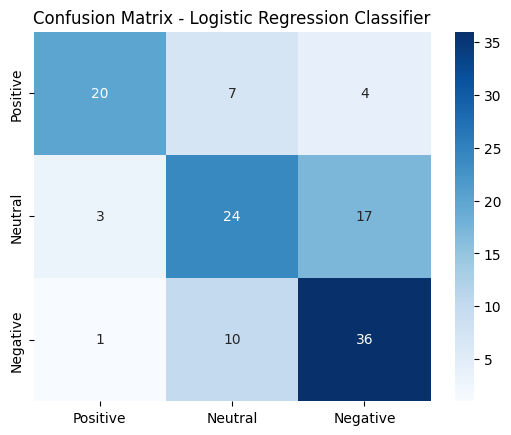

In [ ]:
#Classifier
# =========================
# Imports
# =========================
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# =========================
# Features & Labels
# =========================
X = df['Clean_Review']   # cleaned review text
y = df['TextBlob_Sentiment']   # labels: Positive, Neutral, Negative

# TF-IDF vectorizer
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_df=0.8, min_df=2,max_features=5000)
X_tfidf = vectorizer.fit_transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42, stratify=y)

# Train Logistic Regression
clf = LogisticRegression(max_iter=200,class_weight="balanced")
clf.fit(X_train, y_train)

# Predict & Evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=["Positive", "Neutral", "Negative"])
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Positive","Neutral","Negative"],
            yticklabels=["Positive","Neutral","Negative"])
plt.title("Confusion Matrix - Logistic Regression Classifier")
plt.show()

- **EDA - Further Analysis for TEXT Analytics**

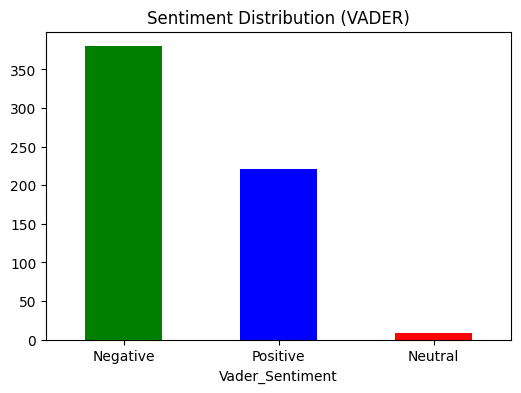

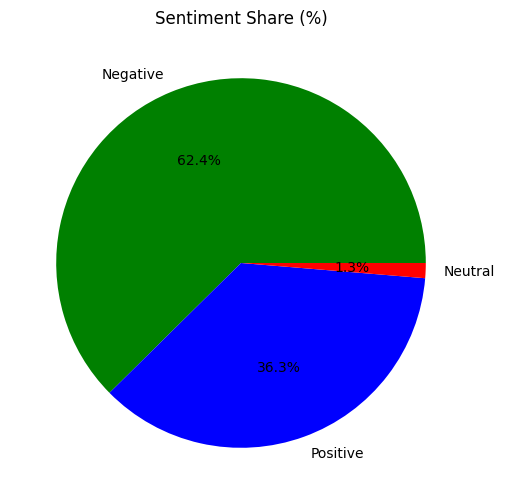

In [ ]:
plt.figure(figsize=(6,4))
df['Vader_Sentiment'].value_counts().plot(kind='bar', color=['g','b','r'])
plt.title("Sentiment Distribution (VADER)")
plt.xticks(rotation=0)
plt.show()

# Pie
df['Vader_Sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['g','b','r'], figsize=(6,6))
plt.ylabel("")
plt.title("Sentiment Share (%)")
plt.show()

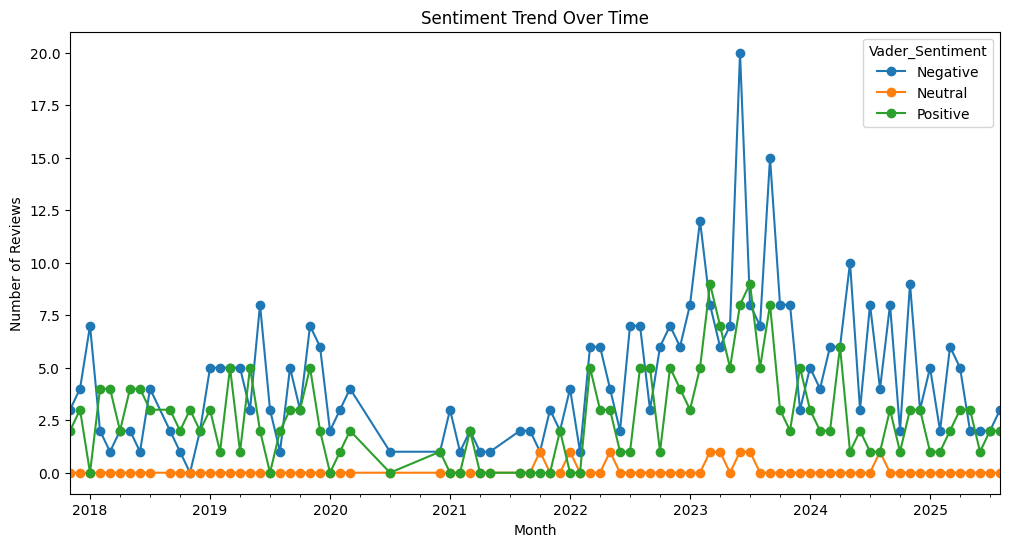

In [ ]:
df['Review Date'] = pd.to_datetime(df['Review Date'], errors='coerce')
sentiment_trend = df.groupby([df['Review Date'].dt.to_period("M"), 'Vader_Sentiment']).size().unstack(fill_value=0)

sentiment_trend.plot(kind='line', marker='o', figsize=(12,6))
plt.title("Sentiment Trend Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Reviews")
plt.show()

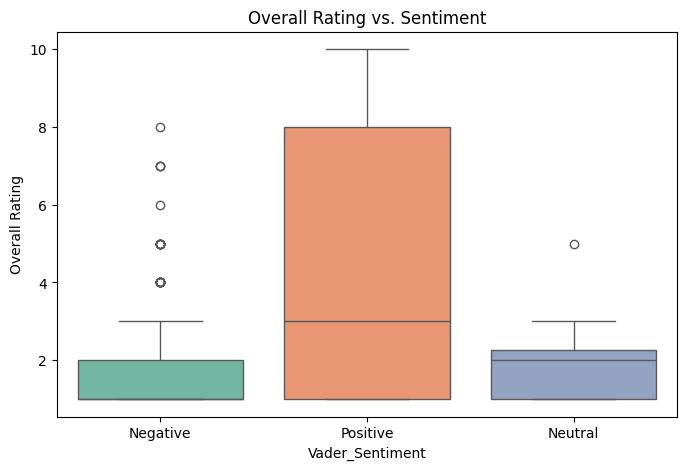

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Vader_Sentiment', y='Overall Rating', data=df, palette='Set2')
plt.title("Overall Rating vs. Sentiment")
plt.show()

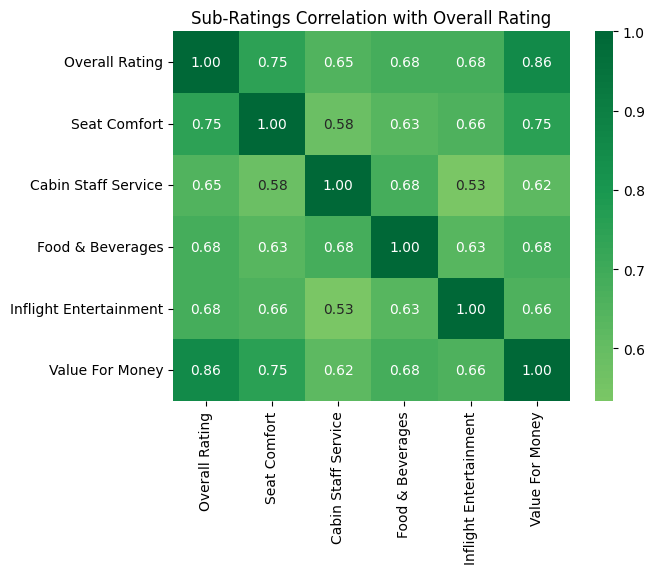

In [ ]:
sub_ratings = df[['Overall Rating','Seat Comfort','Cabin Staff Service','Food & Beverages','Inflight Entertainment','Value For Money']].dropna()
sns.heatmap(sub_ratings.corr(), center=0, cmap='RdYlGn', annot=True, fmt=".2f")
plt.title("Sub-Ratings Correlation with Overall Rating")
plt.show()

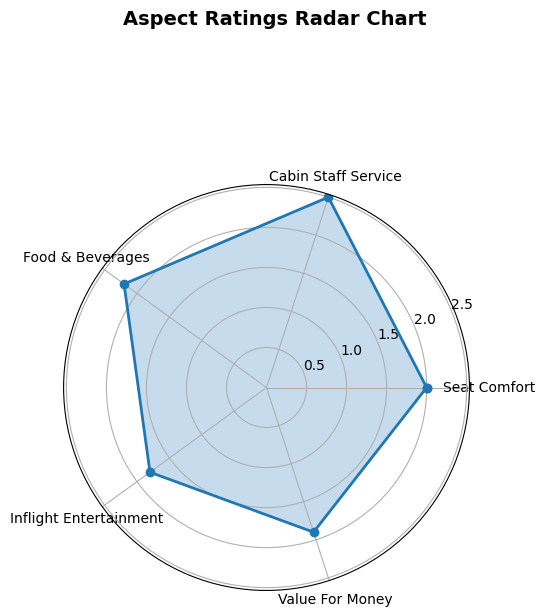

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Aspects for the radar chart
aspects = ['Seat Comfort','Cabin Staff Service','Food & Beverages','Inflight Entertainment','Value For Money']

# Example mean values (replace with df[aspects].mean().tolist() if df exists)
means = [2.0, 2.5, 2.2, 1.8, 1.9]

# Create angles for radar
angles = np.linspace(0, 2*np.pi, len(aspects), endpoint=False).tolist()
stats = means + means[:1]   # close radar
angles += angles[:1]

# Plot radar chart
fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))

ax.plot(angles, stats, 'o-', linewidth=2)
ax.fill(angles, stats, alpha=0.25)

# Set aspect labels
ax.set_thetagrids(np.degrees(angles[:-1]), aspects)

# Add title with padding to avoid overlap
plt.suptitle("Aspect Ratings Radar Chart", y=1.08, fontsize=14, fontweight="bold")

# Adjust layout to avoid label/title clash
plt.tight_layout(pad=3.0)

plt.show()


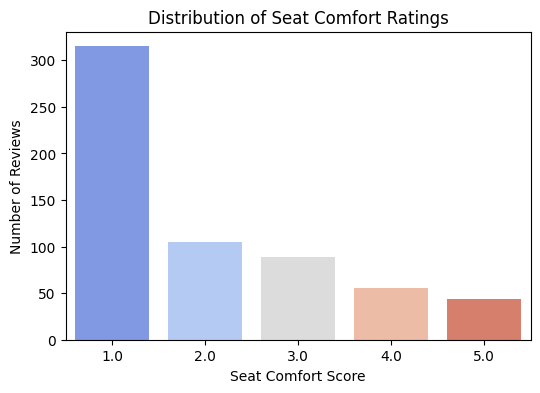

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x="Seat Comfort", data=df, palette="coolwarm")
plt.title("Distribution of Seat Comfort Ratings")
plt.xlabel("Seat Comfort Score")
plt.ylabel("Number of Reviews")
plt.show()

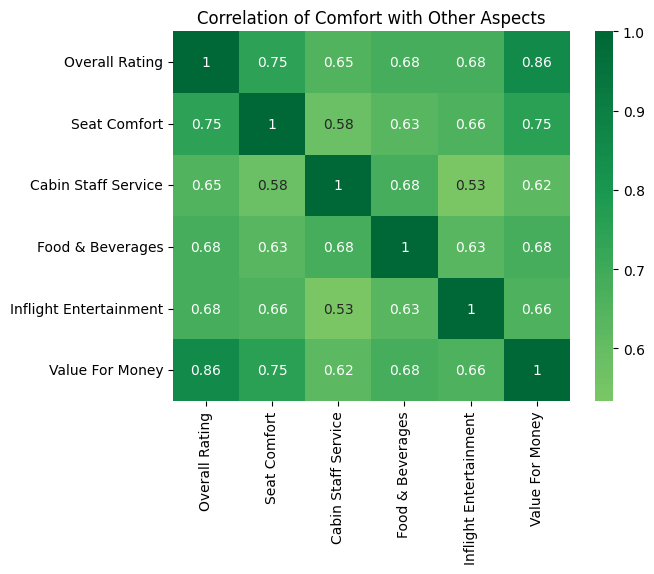

In [ ]:
sub_aspects = df[['Overall Rating','Seat Comfort','Cabin Staff Service','Food & Beverages','Inflight Entertainment','Value For Money']]
sns.heatmap(sub_aspects.corr(), annot=True, cmap="RdYlGn", center=0)
plt.title("Correlation of Comfort with Other Aspects")
plt.show()

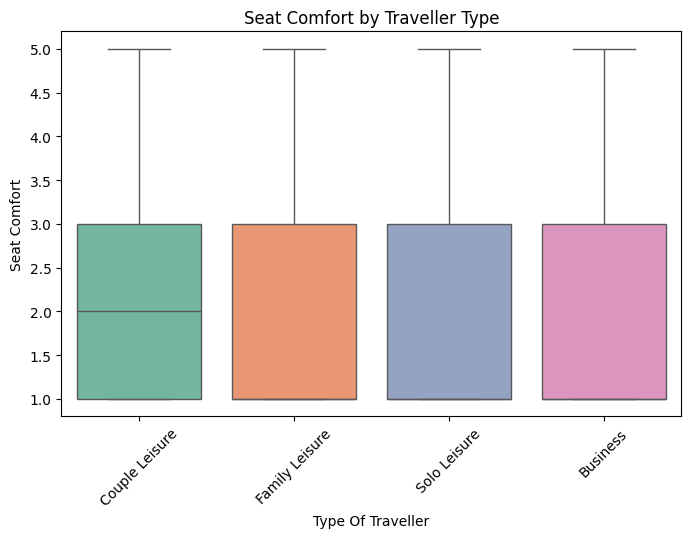

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Type Of Traveller", y="Seat Comfort", data=df, palette="Set2")
plt.xticks(rotation=45)
plt.title("Seat Comfort by Traveller Type")
plt.show()


**---------------------------------------------------------------------------------------------------------**

- **WEB ANALYTICS FOR WEB TRAFFIC & TRENDS**

 <div style="text-align:center;">
  <img src="https://www.themexpert.com/images/best-web-analytics-tools.jpg" width="500">
   </div>

Please upload the Air India SEO Excel file...


Saving airindia.com-organic.Positions-in-20250914-2025-09-16T08_03_03Z.xlsx to airindia.com-organic.Positions-in-20250914-2025-09-16T08_03_03Z (3).xlsx
Columns: Index(['Keyword', 'Position', 'Previous position', 'Search Volume',
       'Keyword Difficulty', 'CPC', 'URL', 'Traffic', 'Traffic (%)',
       'Traffic Cost', 'Competition', 'Number of Results', 'Trends',
       'Timestamp', 'SERP Features by Keyword', 'Keyword Intents',
       'Position Type'],
      dtype='object')
Preview:                                Keyword  Position  Previous position  \
0                            air india         1                  1   
1                           terminal 1         1                  1   
2               air india web check in         1                  1   
3  indira gandhi international airport         1                  1   
4                              vistara         1                  1   

   Search Volume  Keyword Difficulty   CPC  \
0        1220000                  90 

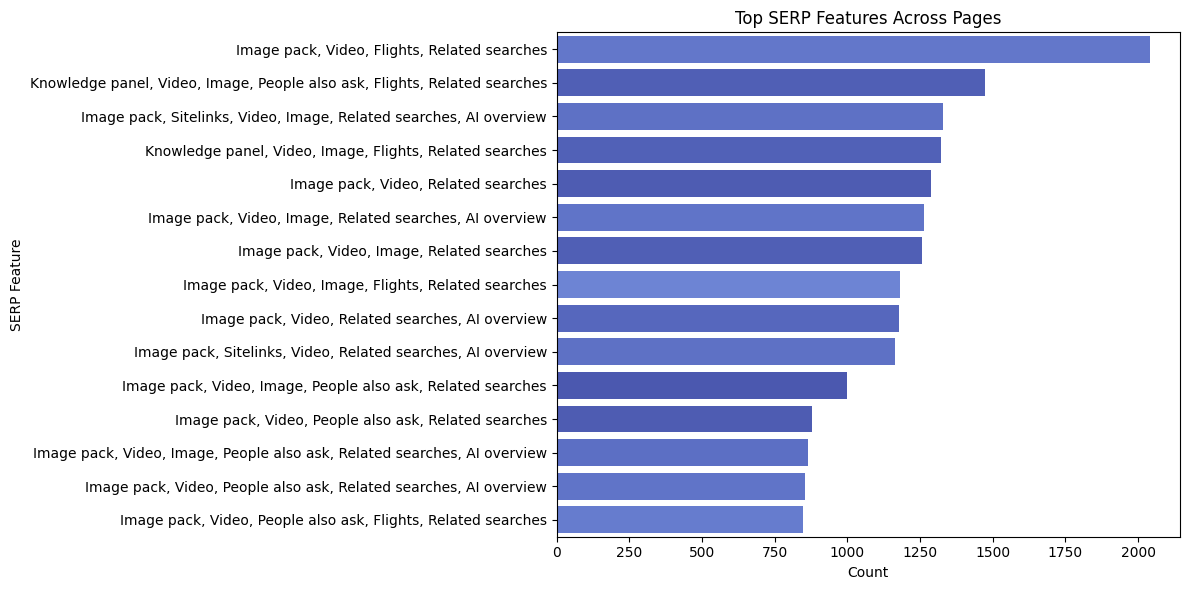

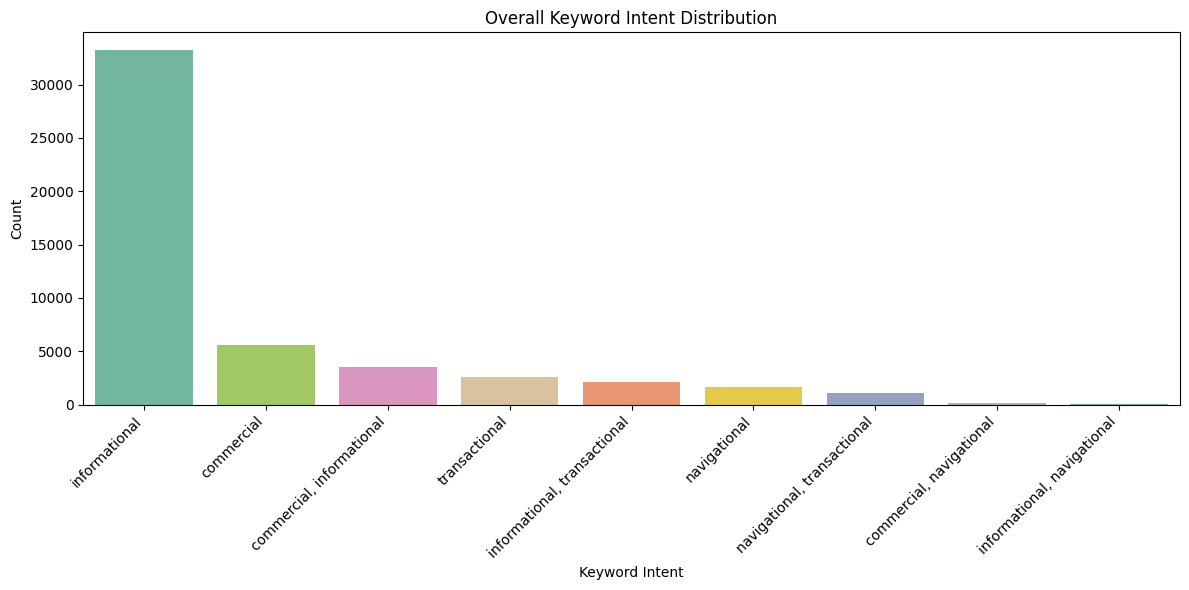

/tmp/ipython-input-3997467120.py:80: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


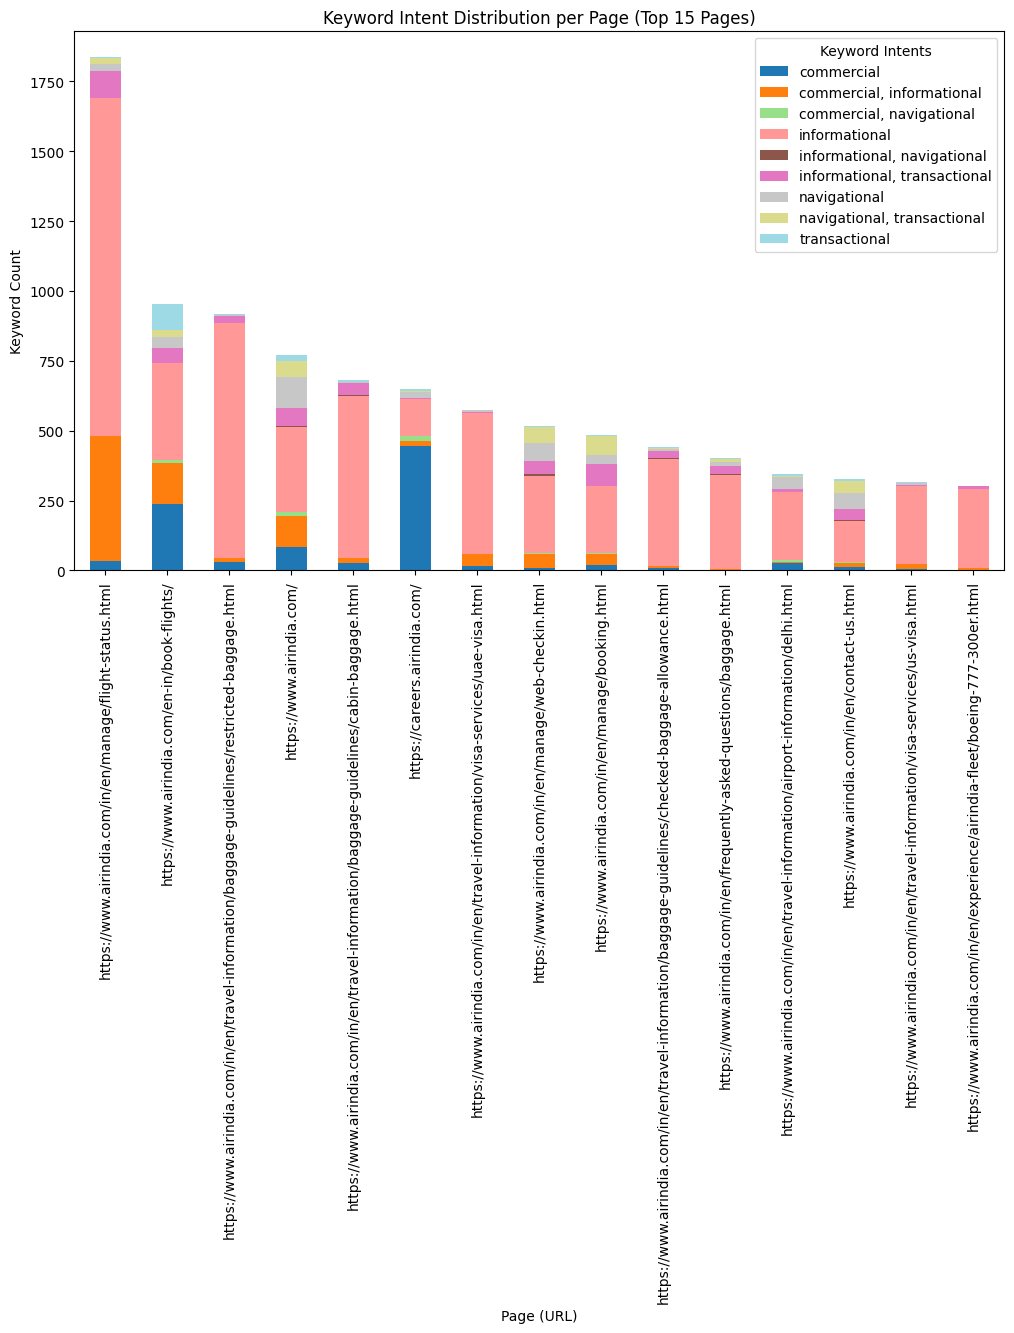

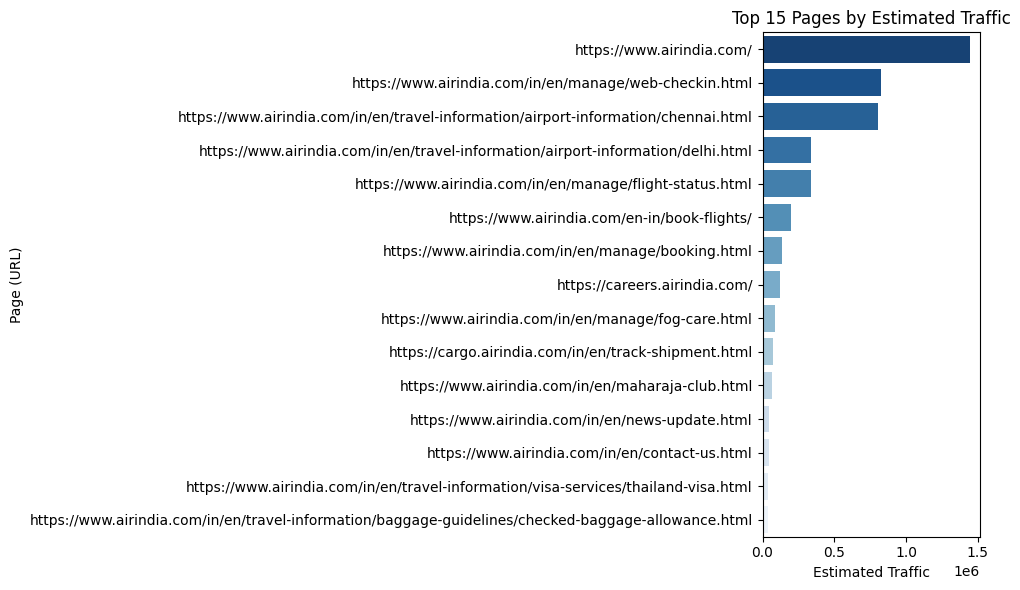

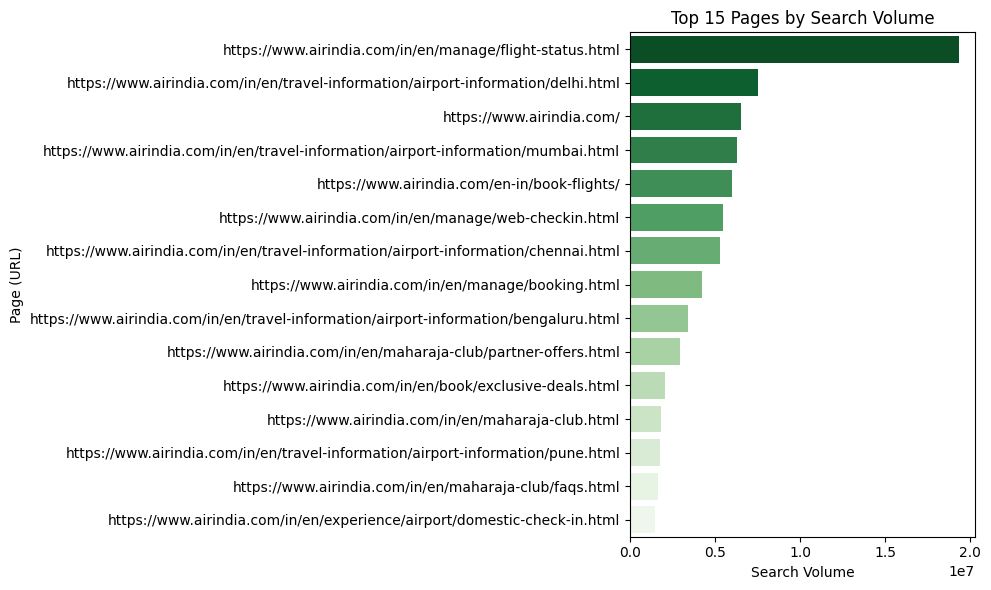

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Page-level, SERP features, keyword intent summaries, and stacked charts ready.


In [4]:
# Air India Web Analytics (Page-level)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# --- Upload File ---
print("Please upload the Air India SEO Excel file...")
uploaded = files.upload()

# Get file name dynamically
file_path = list(uploaded.keys())[0]
df = pd.read_excel(file_path)

# --- Inspect Data ---
print("Columns:", df.columns)
print("Preview:", df.head())

# --- Clean & Select Relevant Columns ---
page_df = df[["URL", "Keyword", "Search Volume", "Position", "Traffic", "CPC", "SERP Features by Keyword", "Keyword Intents"]].copy()

# Handle missing values
page_df = page_df.dropna(subset=["URL"])

# --- Aggregate Metrics by Page (URL) ---
page_summary = page_df.groupby("URL").agg({
    "Keyword": "count",                  # number of ranking keywords
    "Search Volume": "sum",              # total search volume
    "Traffic": "sum",                    # estimated traffic
    "CPC": "mean",                       # average CPC
    "Position": "mean"                   # average ranking position
}).reset_index()

# Rename columns for clarity
page_summary = page_summary.rename(columns={
    "Keyword": "Keyword Count",
    "Search Volume": "Total Search Volume",
    "Traffic": "Total Traffic",
    "CPC": "Avg CPC",
    "Position": "Avg Position"
})

# --- SERP Features per Page ---
serp_features = page_df.groupby(["URL", "SERP Features by Keyword"]).size().reset_index(name="Count")

plt.figure(figsize=(12,6))
sns.countplot(y="SERP Features by Keyword", data=page_df, order=page_df["SERP Features by Keyword"].value_counts().index[:15], hue="SERP Features by Keyword",
    palette="coolwarm",
    legend=False   )
plt.title("Top SERP Features Across Pages")
plt.xlabel("Count")
plt.ylabel("SERP Feature")
plt.tight_layout()
plt.show()


# --- Keyword Intent Distribution per Page ---
intent_distribution = page_df.groupby(["URL", "Keyword Intents"]).size().reset_index(name="Count")

plt.figure(figsize=(12,6))
sns.countplot(x="Keyword Intents", data=page_df, order=page_df["Keyword Intents"].value_counts().index, hue="Keyword Intents", palette="Set2", legend=False)
plt.title("Overall Keyword Intent Distribution")
plt.xlabel("Keyword Intent")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")  # Rotate labels to prevent overlap
plt.tight_layout()
plt.show()


# --- Stacked Bar Chart: Keyword Intent Distribution per Page ---
intent_pivot = intent_distribution.pivot(index="URL", columns="Keyword Intents", values="Count").fillna(0)
intent_pivot_top = intent_pivot.loc[intent_pivot.sum(axis=1).sort_values(ascending=False).head(15).index]

intent_pivot_top.plot(kind="bar", stacked=True, figsize=(12,7), colormap="tab20")
plt.title("Keyword Intent Distribution per Page (Top 15 Pages)")
plt.xlabel("Page (URL)")
plt.ylabel("Keyword Count")
plt.legend(title="Keyword Intents")
plt.tight_layout()
plt.show()

# --- Top Pages by Traffic ---
top_pages_traffic = page_summary.sort_values(by="Total Traffic", ascending=False).head(15)

plt.figure(figsize=(10,6))
sns.barplot(y="URL", x="Total Traffic", data=top_pages_traffic, hue="URL", palette="Blues_r", legend=False)
plt.title("Top 15 Pages by Estimated Traffic")
plt.xlabel("Estimated Traffic")
plt.ylabel("Page (URL)")
plt.tight_layout()
plt.show()

# --- Top Pages by Search Volume ---
top_pages_volume = page_summary.sort_values(by="Total Search Volume", ascending=False).head(15)

plt.figure(figsize=(10,6))
sns.barplot(y="URL", x="Total Search Volume", data=top_pages_volume, hue="URL",  palette="Greens_r", legend=False)
plt.title("Top 15 Pages by Search Volume")
plt.xlabel("Search Volume")
plt.ylabel("Page (URL)")
plt.tight_layout()
plt.show()

# --- Export Results ---
page_summary.to_csv("airindia_page_level_summary.csv", index=False)
serp_features.to_csv("airindia_serp_features_per_page.csv", index=False)
intent_distribution.to_csv("airindia_intent_distribution_per_page.csv", index=False)

files.download("airindia_page_level_summary.csv")
files.download("airindia_serp_features_per_page.csv")
files.download("airindia_intent_distribution_per_page.csv")
print("Page-level, SERP features, keyword intent summaries, and stacked charts ready.")

- **Web Analytics: Recommendation System**

 <div style="text-align:center;">
  <img src="https://tse2.mm.bing.net/th/id/OIP.GnGKuXVi4PQK0w-XOcnX5AHaEn?rs=1&pid=ImgDetMain&o=7&rm=3" width="400">
   </div>

Libraries imported successfully!
Loading dataset from 'dataset for airindia.xlsx'...
Dataset loaded successfully.

Step 1: Standardizing routes to full city names...
Route standardization complete.

Step 2: Building Collaborative Filtering Engine...
Engine built successfully!

Step 3: Defining Recommendation Functions...
Recommendation functions defined.

Step 4: Generating Recommendations...

--- Recommendations for EXISTING User: Mike Halpenny ---
Found 5 personalized recommendations:
1. BHOPAL - DELHI
2. DELHI - MUMBAI
3. DELHI - TOKYO
4. BENGALURU - KOLKATA
5. MUMBAI - BENGALURU

--- Recommendations for a NEW User ---

Top 5 recommended routes for any new user:
1. BENGALURU - MUMBAI (Average Rating: 7.17 from 12 reviews)
2. MUMBAI - BENGALURU (Average Rating: 6.59 from 17 reviews)
3. MUMBAI - DELHI (Average Rating: 6.29 from 14 reviews)
4. LONDON HEATHROW - DELHI (Average Rating: 4.93 from 14 reviews)
5. DELHI - BANGKOK (Average Rating: 4.80 from 10 reviews)

--- Best Rated Routes 

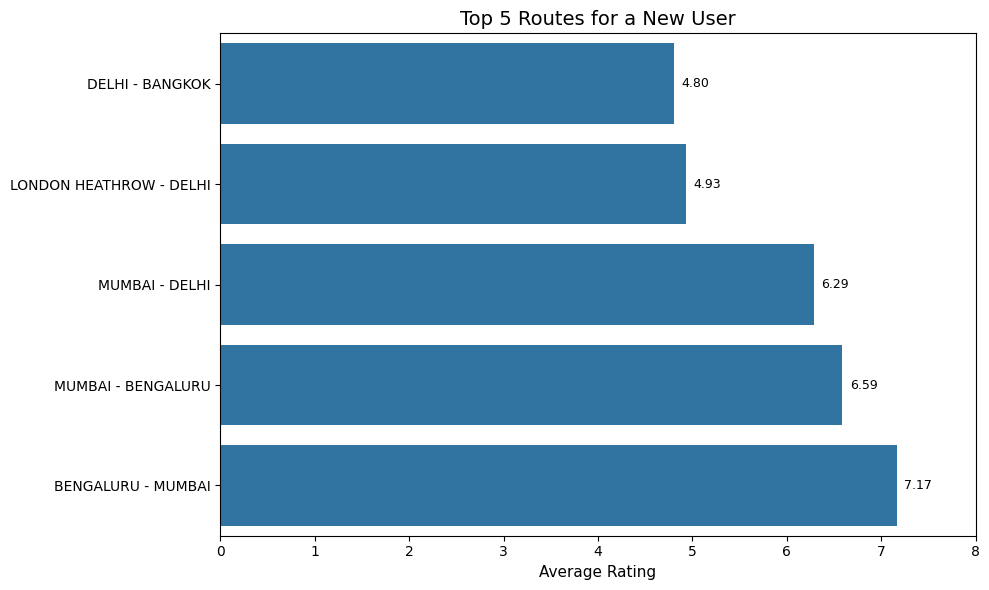


--- Best Rated Routes TO DELHI ---
Generated plot: 'top_5_rated_routes_to_delhi.png'


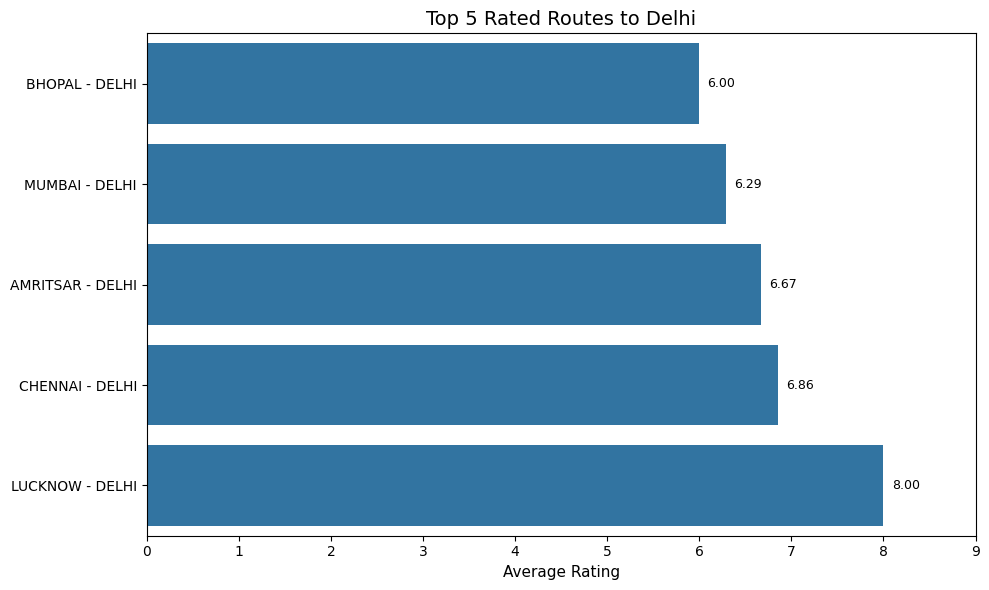


--- Best Rated Routes FROM MUMBAI ---
Generated plot: 'top_5_rated_routes_from_mumbai.png'


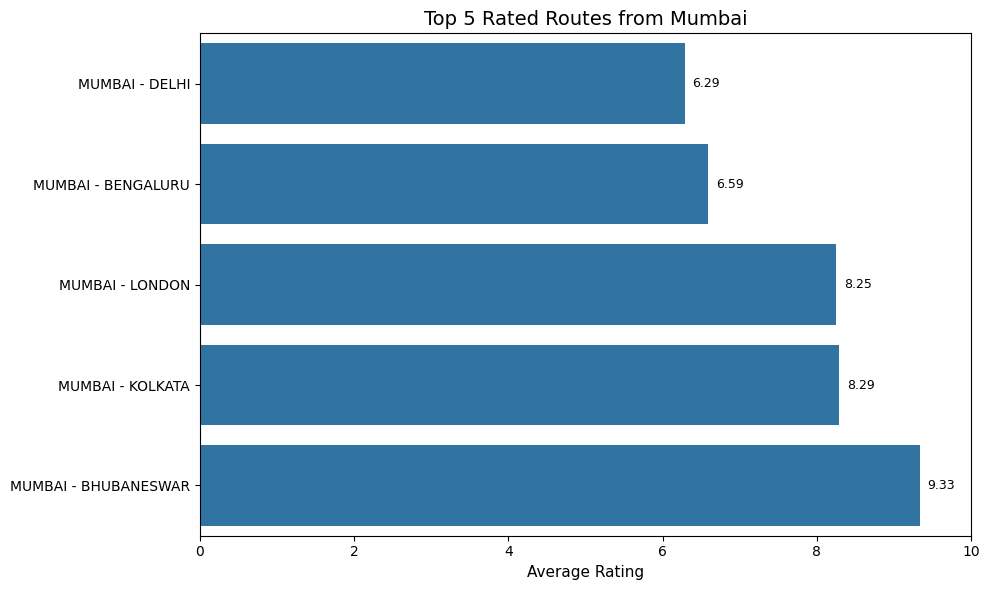

In [ ]:
# =============================================================================
# SECTION 1: SETUP & LIBRARIES
# =============================================================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import csr_matrix
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
import re
import numpy as np
import math # Added import here

print("Libraries imported successfully!")


# =============================================================================
# SECTION 2: DATA LOADING & PRE-PROCESSING
# =============================================================================

FILE_PATH = 'dataset for airindia.xlsx' # Corrected filename here
try:
    print(f"Loading dataset from '{FILE_PATH}'...")
    main_df = pd.read_excel(FILE_PATH)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print(f"ERROR: The file '{FILE_PATH}' was not found.")
    exit()

# --- Standardize Routes to Full City Names ---
def standardize_routes_to_full_names(df):
    """
    Standardizes the 'Route' column to a consistent 'CITY NAME - CITY NAME' format.
    """
    print("\nStep 1: Standardizing routes to full city names...")
    name_or_code_to_code = {
        'mumbai': 'BOM', 'bom': 'BOM', 'new delhi': 'DEL', 'delhi': 'DEL', 'del': 'DEL',
        'bengaluru': 'BLR', 'bangalore': 'BLR', 'blr': 'BLR', 'kolkata': 'CCU', 'ccu': 'CCU',
        'chennai': 'MAA', 'maa': 'MAA', 'hyderabad': 'HYD', 'hyd': 'HYD', 'goa': 'GOI', 'goi': 'GOI',
        'pune': 'PNQ', 'pnq': 'PNQ', 'ahmedabad': 'AMD', 'amd': 'AMD', 'jaipur': 'JAI', 'jai': 'JAI',
        'london': 'LHR', 'lhr': 'LHR', 'new york': 'JFK', 'jfk': 'JFK',
    }
    code_to_full_name = {
        'BOM': 'MUMBAI', 'DEL': 'DELHI', 'BLR': 'BENGALURU', 'CCU': 'KOLKATA',
        'MAA': 'CHENNAI', 'HYD': 'HYDERABAD', 'GOI': 'GOA', 'PNQ': 'PUNE',
        'AMD': 'AHMEDABAD', 'JAI': 'JAIPUR', 'LHR': 'LONDON', 'JFK': 'NEW YORK',
    }
    def format_route(route):
        if not isinstance(route, str): return route
        route_lower = route.lower().strip()
        parts = re.split(r'\s+to\s+|\s*-\s*|\s*/\s*', route_lower)
        if len(parts) == 2:
            origin_part, dest_part = parts[0].strip(), parts[1].strip()
            origin_code = name_or_code_to_code.get(origin_part)
            origin_full_name = code_to_full_name.get(origin_code, origin_part.upper())
            dest_code = name_or_code_to_code.get(dest_part)
            dest_full_name = code_to_full_name.get(dest_code, dest_part.upper())
            return f"{origin_full_name} - {dest_full_name}"
        return route.upper()
    df['Route'] = df['Route'].apply(format_route)
    print("Route standardization complete.")
    return df

main_df = standardize_routes_to_full_names(main_df)


# =============================================================================
# SECTION 3: BUILDING THE CORE ENGINE
# =============================================================================
print("\nStep 2: Building Collaborative Filtering Engine...")
def create_engine_matrices(df):
    df_filtered = df[['Author', 'Route', 'Overall Rating']].dropna()
    df_filtered['Overall Rating'] = pd.to_numeric(df_filtered['Overall Rating'], errors='coerce').dropna()
    user_counts = df_filtered['Author'].value_counts()
    route_counts = df_filtered['Route'].value_counts()
    df_final = df_filtered[df_filtered['Author'].isin(user_counts[user_counts >= 2].index) & \
                           df_filtered['Route'].isin(route_counts[route_counts >= 2].index)]
    if df_final.empty: raise ValueError("Filtered dataset is empty.")
    user_route_matrix = df_final.pivot_table(index='Author', columns='Route', values='Overall Rating').fillna(0)
    user_similarity_df = pd.DataFrame(cosine_similarity(user_route_matrix),
                                      index=user_route_matrix.index, columns=user_route_matrix.index)
    return user_route_matrix, user_similarity_df

user_route_matrix, user_similarity_df = create_engine_matrices(main_df)
print("Engine built successfully!")


# =============================================================================
# SECTION 4: RECOMMENDATION FUNCTIONS
# =============================================================================
print("\nStep 3: Defining Recommendation Functions...")

# --- Function for Existing Users ---
def recommend_for_existing_user(user_name, user_route_matrix, user_similarity_df, n=5):
    similar_users = user_similarity_df[user_name].sort_values(ascending=False).drop(user_name)
    if similar_users.empty: return []
    routes_rated_by_user = user_route_matrix.loc[user_name][user_route_matrix.loc[user_name] > 0].index
    recommendations = {}
    for sim_user, score in similar_users.items():
        for route, rating in user_route_matrix.loc[sim_user].items():
            if rating > 0 and route not in routes_rated_by_user:
                if route not in recommendations: recommendations[route] = 0
                recommendations[route] += score * rating
    sorted_recs = sorted(recommendations.items(), key=lambda item: item[1], reverse=True)
    return [route for route, score in sorted_recs[:n]]

# --- Function for New Users ---
def recommend_for_new_user(df, n=5, min_reviews=5):
    route_stats = df.groupby('Route')['Overall Rating'].agg(['mean', 'count']).reset_index()
    reliable_routes = route_stats[route_stats['count'] >= min_reviews]
    top_rated_routes = reliable_routes.sort_values('mean', ascending=False)
    return top_rated_routes.head(n)

# --- Function for Destination-Based Recommendations ---
def recommend_routes_by_destination(destination_city, df, n=5, min_reviews=3):
    destination_city = destination_city.upper()
    dest_routes = df[df['Route'].str.strip().str.endswith(f" - {destination_city}", na=False)].copy()
    if dest_routes.empty: return f"No routes found with the destination '{destination_city}'."
    route_stats = dest_routes.groupby('Route')['Overall Rating'].agg(['mean', 'count']).reset_index()
    reliable_routes = route_stats[route_stats['count'] >= min_reviews]
    if reliable_routes.empty: return f"Not enough reviews for routes to '{destination_city}'."
    top_rated_routes = reliable_routes.sort_values('mean', ascending=False)
    return top_rated_routes.head(n)

# --- NEW: Function for Origin-Based Recommendations ---
def recommend_routes_by_origin(origin_city, df, n=5, min_reviews=3):
    """
    Recommends the best routes from a specific origin city based on average ratings.
    """
    # Ensure origin city is in the correct format (uppercase)
    origin_city = origin_city.upper()

    # Filter for routes that start with the desired origin
    origin_routes = df[df['Route'].str.strip().str.startswith(f"{origin_city} - ", na=False)].copy()

    if origin_routes.empty:
        return f"No routes found with the origin '{origin_city}'."

    # Calculate average rating and count for these specific routes
    route_stats = origin_routes.groupby('Route')['Overall Rating'].agg(['mean', 'count']).reset_index()

    # Filter for routes with a reliable number of reviews
    reliable_routes = route_stats[route_stats['count'] >= min_reviews]

    if reliable_routes.empty:
        return f"Not enough reviews for routes from '{origin_city}' to make a reliable recommendation."

    # Sort by the highest average rating
    top_rated_routes = reliable_routes.sort_values('mean', ascending=False)

    return top_rated_routes.head(n)

print("Recommendation functions defined.")


# =============================================================================
# SECTION 5: EXAMPLE USAGE
# =============================================================================
print("\nStep 4: Generating Recommendations...")

# --- Example 1: For an Existing User ---
if not user_route_matrix.empty:
    test_user = user_route_matrix.index[15]
    print(f"\n--- Recommendations for EXISTING User: {test_user} ---")
    recommendations = recommend_for_existing_user(test_user, user_route_matrix, user_similarity_df)
    if recommendations:
        print(f"Found {len(recommendations)} personalized recommendations:")
        for i, route in enumerate(recommendations, 1):
            print(f"{i}. {route}")

# --- Example 2: For a NEW User ---
print("\n--- Recommendations for a NEW User ---")
new_user_recommendations = recommend_for_new_user(main_df, n=5, min_reviews=10)
if not new_user_recommendations.empty:
    print(f"\nTop 5 recommended routes for any new user:")
    for i, row in enumerate(new_user_recommendations.itertuples(), 1):
        print(f"{i}. {row.Route} (Average Rating: {row.mean:.2f} from {row.count} reviews)")

# --- Example 3: For a person whose DESTINATION is DELHI ---
print("\n--- Best Rated Routes TO DELHI ---")
destination_recommendations = recommend_routes_by_destination('DELHI', main_df, n=5, min_reviews=3)
if isinstance(destination_recommendations, pd.DataFrame):
    if not destination_recommendations.empty:
        print(f"\nTop 5 recommended routes for a person flying to DELHI:")
        for i, row in enumerate(destination_recommendations.itertuples(), 1):
            print(f"{i}. {row.Route} (Average Rating: {row.mean:.2f} from {row.count} reviews)")
else:
    print(destination_recommendations)

# --- Example 4: For a person whose SOURCE is MUMBAI ---
print("\n--- Best Rated Routes FROM MUMBAI ---")
origin_recommendations = recommend_routes_by_origin('MUMBAI', main_df, n=5, min_reviews=3)
if isinstance(origin_recommendations, pd.DataFrame):
    if not origin_recommendations.empty:
        print(f"\nTop 5 recommended destinations for a person flying from MUMBAI:")
        for i, row in enumerate(origin_recommendations.itertuples(), 1):
            print(f"{i}. {row.Route} (Average Rating: {row.mean:.2f} from {row.count} reviews)")
else:
    print(origin_recommendations)


# =============================================================================
# SECTION 6: VISUALIZATION
# =============================================================================
print("\nStep 5: Generating Plots...")

def safe_filename(title):
    """Make a filesystem-safe filename from title."""
    name = re.sub(r'[^0-9a-zA-Z_\-]+', '_', title.strip().lower())
    return f"{name}.png"

def plot_recommendations(recommendations_df, title):
    """
    Generates a horizontal bar chart for a given recommendations DataFrame.
    Expects recommendations_df to contain columns: 'Route' and 'mean' (avg rating).
    If input is a string (error message) or empty DataFrame, prints and returns.
    """
    # Handle error messages returned by the recommendation functions
    if isinstance(recommendations_df, str):
        print(recommendations_df)
        return

    if not isinstance(recommendations_df, pd.DataFrame) or recommendations_df.empty:
        print(f"Cannot plot: No data for '{title}'.")
        return

    # Ensure required columns exist
    if 'Route' not in recommendations_df.columns or 'mean' not in recommendations_df.columns:
        print(f"DataFrame for '{title}' must contain 'Route' and 'mean' columns.")
        return

    # Sort so the highest rated routes are at top of the horizontal bar chart
    df_sorted = recommendations_df.sort_values('mean', ascending=True).copy()

    plt.figure(figsize=(10, 6))
    # Horizontal barplot: x is mean (rating), y is route
    ax = sns.barplot(
        x='mean',
        y='Route',
        data=df_sorted,
        dodge=False
    )

    # Compute x-axis limit (some padding)
    max_mean = df_sorted['mean'].max()
    x_max = max(5, math.ceil(max_mean + 0.5))  # if your ratings are 1-5, this keeps 5 as min max
    ax.set_xlim(0, x_max)

    # Annotate bars with numeric rating value
    for i, (_, row) in enumerate(df_sorted.iterrows()):
        mean_val = row['mean']
        # annotate at x = mean + small offset
        ax.text(mean_val + (0.01 * x_max), i, f'{mean_val:.2f}', va='center', ha='left', fontsize=9)

    plt.title(title, fontsize=14)
    plt.xlabel('Average Rating', fontsize=11)
    plt.ylabel('')
    plt.tight_layout()

    filename = safe_filename(title)
    plt.savefig(filename, dpi=150)
    print(f"Generated plot: '{filename}'")
    plt.show()
    plt.close()

# --- Example 1: For a NEW User ---
print("\n--- Recommendations for a NEW User ---")
new_user_recommendations = recommend_for_new_user(main_df, n=5, min_reviews=10)
# recommend_for_new_user returns a DataFrame with columns ['Route','mean','count']
plot_recommendations(new_user_recommendations, 'Top 5 Routes for a New User')

# --- Example 2: For a person whose DESTINATION is DELHI ---
print("\n--- Best Rated Routes TO DELHI ---")
destination_recommendations = recommend_routes_by_destination('DELHI', main_df, n=5, min_reviews=3)
# recommend_routes_by_destination returns either a DataFrame or a string message
plot_recommendations(destination_recommendations if isinstance(destination_recommendations, pd.DataFrame) else destination_recommendations,
                     'Top 5 Rated Routes to Delhi')

# --- Example 3: For a person whose SOURCE is MUMBAI ---
print("\n--- Best Rated Routes FROM MUMBAI ---")
origin_recommendations = recommend_routes_by_origin('MUMBAI', main_df, n=5, min_reviews=3)
plot_recommendations(origin_recommendations if isinstance(origin_recommendations, pd.DataFrame) else origin_recommendations,
                     'Top 5 Rated Routes from Mumbai')




- **EDA - More insights for Web Analytics**

Saved grouped feature chart to plots/feature_comparison_top_routes.png


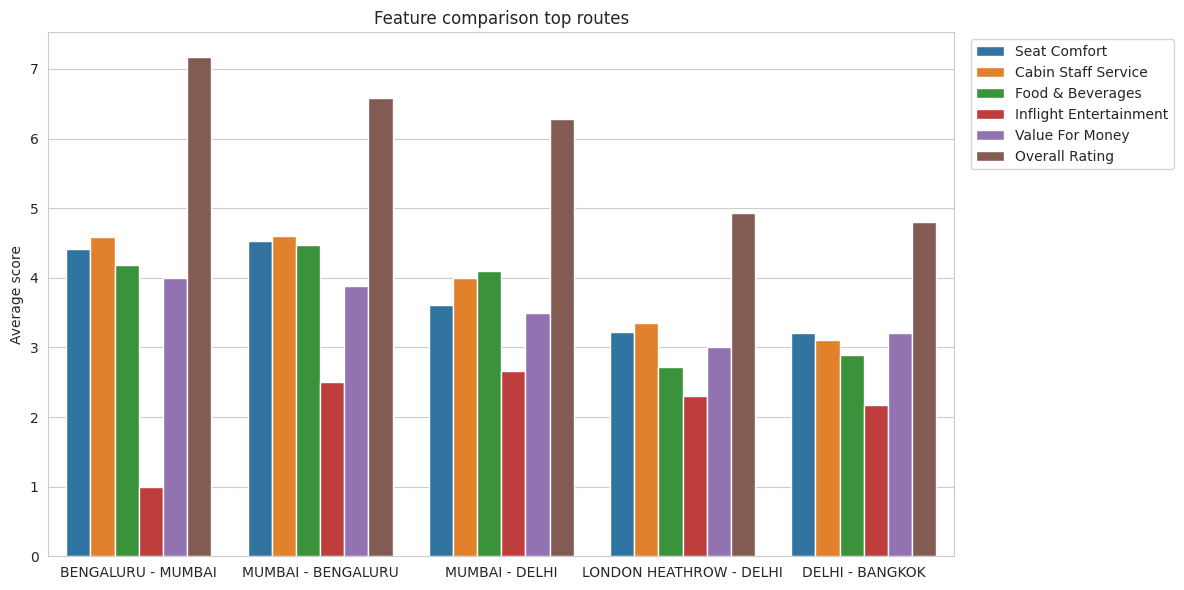

Saved radar chart to plots/radar_-_top_2_routes.png


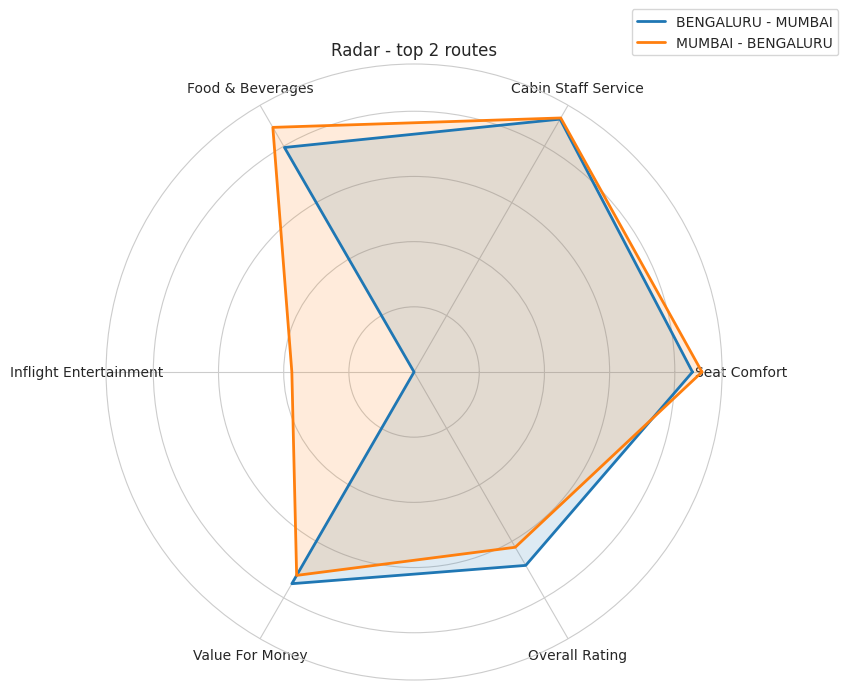

Saved similarity heatmap to plots/route_similarity_heatmap.png


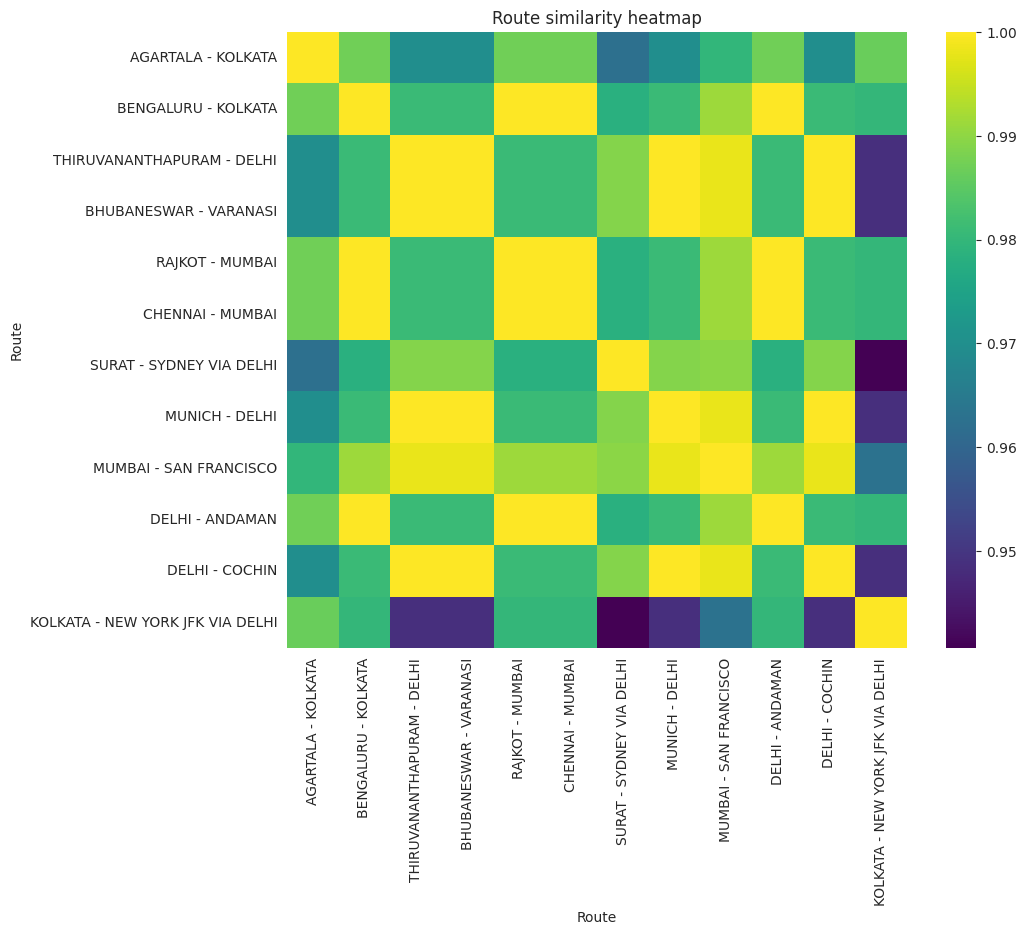

No text column 'Review' found for wordcloud.


In [ ]:
# =============================================================================
# SECTION 7: ADDITIONAL INSIGHTFUL CHARTS
# =============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
import os
from math import pi

#Set style safely (no OSError)
sns.set_style("whitegrid")

# Ensure output folder
OUT_DIR = "plots"
os.makedirs(OUT_DIR, exist_ok=True)

# Which feature columns to use
FEATURE_COLS = [
    'Seat Comfort',
    'Cabin Staff Service',
    'Food & Beverages',
    'Inflight Entertainment',
    'Value For Money',
    'Overall Rating'
]

def to_numeric_cols(df, cols):
    for c in cols:
        if c in df.columns:
            df[c] = pd.to_numeric(df[c], errors='coerce')
    return df

main_df = to_numeric_cols(main_df, FEATURE_COLS)

# ---------- Helper: build route-feature averaged matrix ----------
def build_route_feature_matrix(df, feature_cols):
    rf = df.groupby('Route')[feature_cols].mean()
    rf = rf.fillna(df[feature_cols].mean())
    return rf

# ---------- 1) Grouped bar chart for top-N routes ----------
def plot_grouped_features_top_routes(route_list, route_feature_matrix, title="Feature comparison"):
    if len(route_list) == 0:
        print("No routes provided for grouped chart.")
        return
    df = route_feature_matrix.loc[route_list]
    df = df.reset_index().melt(id_vars='Route', var_name='Feature', value_name='Value')
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Route', y='Value', hue='Feature', data=df)
    plt.title(title)
    plt.ylabel('Average score')
    plt.xlabel('')
    plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
    plt.tight_layout()
    fname = os.path.join(OUT_DIR, f"{title.lower().replace(' ','_')}.png")
    plt.savefig(fname, dpi=150, bbox_inches='tight')
    print(f"Saved grouped feature chart to {fname}")
    plt.show()
    plt.close()

# ---------- 2) Radar chart ----------
def plot_radar_for_routes(route_names, route_feature_matrix, title='Route feature radar'):
    df = route_feature_matrix.copy()
    min_vals = df.min()
    max_vals = df.max()
    norm = (df - min_vals) / (max_vals - min_vals + 1e-9)
    chosen = norm.loc[[r for r in route_names if r in norm.index]]
    if chosen.empty:
        print("No matching routes found for radar chart.")
        return

    labels = list(chosen.columns)
    num_vars = len(labels)
    angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
    angles += angles[:1]

    plt.figure(figsize=(8, 8))
    ax = plt.subplot(111, polar=True)
    for route, row in chosen.iterrows():
        values = row.tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=2, label=route)
        ax.fill(angles, values, alpha=0.15)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)
    ax.set_yticklabels([])
    plt.title(title)
    plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
    fname = os.path.join(OUT_DIR, f"{title.lower().replace(' ','_')}.png")
    plt.savefig(fname, dpi=150, bbox_inches='tight')
    print(f"Saved radar chart to {fname}")
    plt.show()
    plt.close()

# ---------- 3) Similarity heatmap ----------
def plot_route_similarity_heatmap(route_feature_matrix, top_n=15, title='Route similarity heatmap'):
    order = route_feature_matrix['Overall Rating'].sort_values(ascending=False).head(top_n).index
    mat = route_feature_matrix.loc[order]
    sim = cosine_similarity(mat.values)
    sim_df = pd.DataFrame(sim, index=mat.index, columns=mat.index)
    plt.figure(figsize=(10, 8))
    sns.heatmap(sim_df, cmap='viridis', xticklabels=True, yticklabels=True)
    plt.title(title)
    fname = os.path.join(OUT_DIR, f"{title.lower().replace(' ','_')}.png")
    plt.savefig(fname, dpi=150, bbox_inches='tight')
    print(f"Saved similarity heatmap to {fname}")
    plt.show()
    plt.close()
    return sim_df



# ---------------------------
# Build route-feature matrix
# ---------------------------
try:
    route_feat_mat = build_route_feature_matrix(main_df, FEATURE_COLS)
except KeyError as e:
    print("Could not build route-feature matrix:", e)
    route_feat_mat = pd.DataFrame()

# new_user_recommendations output
top_routes = []
if isinstance(new_user_recommendations, pd.DataFrame) and not new_user_recommendations.empty:
    top_routes = new_user_recommendations['Route'].tolist()

# charts
if not route_feat_mat.empty and len(top_routes) >= 2:
    plot_grouped_features_top_routes(top_routes[:5], route_feat_mat, title="Feature comparison top routes")
    plot_radar_for_routes(top_routes[:2], route_feat_mat, title="Radar - top 2 routes")
if not route_feat_mat.empty:
    plot_route_similarity_heatmap(route_feat_mat, top_n=12, title="Route similarity heatmap")

